## Housing Values in Suburbs of Boston

The Boston data frame has 506 rows and 14 columns. This data frame contains the following columns:

<li> crim - per capita crime rate by town.
<li> zn - proportion of residential land zoned for lots over 25,000 sq.ft.
<li> indus - proportion of non-retail business acres per town.
<li> chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
<li> nox - nitrogen oxides concentration (parts per 10 million).
<li> rm - average number of rooms per dwelling.
<li> age - proportion of owner-occupied units built prior to 1940.
<li> dis - weighted mean of distances to five Boston employment centres.
<li> rad - index of accessibility to radial highways.
<li> tax - full-value property-tax rate per 10,000 dollars.
<li> ptratio - pupil-teacher ratio by town.
<li> black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
<li> lstat - lower status of the population (percent).
<li> medv - median value of owner-occupied homes in 1000s (dollar).

In [18]:
#load libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.python.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import gc; gc.enable()

In [19]:
#define variables
learning_rate = 0.01
epochs_value = 100
batch_size_value = 8

In [20]:
#define features and label
FEATURES = ["crim", "zn", "indus", "nox", "rm", "age", "dis", "tax", "ptratio"]
LABEL = "medv"

In [21]:
# fix random seed for reproducibility
seed = 123; 
np.random.seed(seed); 
tf.set_random_seed(seed)

## load dataset

In [36]:
#load data
data = pd.read_csv("Boston.csv")

#general info
print('Data shape:',data.shape,'\n')
print('Data types:','\n',data.dtypes,'\n')
print('Data head:','\n',data.head(5),'\n')
print('Describe data:','\n',data.describe())

Data shape: (506, 14) 

Data types: 
 crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object 

Data head: 
       crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2   

Describe data: 
              crim

## Training and Test Split 85% and 15%

In [37]:
#train test split
training_set ,test_set = train_test_split(data,test_size=0.15)

# Build the model

In [39]:
#model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,  input_shape=(len(FEATURES),), activation="sigmoid", 
                                kernel_initializer = tf.random_normal_initializer))
model.add(tf.keras.layers.Dense(1,kernel_initializer = tf.random_normal_initializer)) 
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
#get weights [0], get bias [1]
layer_input = model.layers[0]
print(layer_input.get_weights()[0],'\n')
print(layer_input.get_weights()[0].shape)

[[-1.0883334   1.6099403  -1.2420341  -0.57991624  0.9011749  -0.5680958
   0.11468925  0.7251606   1.0741915   0.9523627 ]
 [ 0.63224566 -0.4683439   0.39733338 -0.5503299  -1.3921223  -1.3164045
   2.0284896   1.2268329  -0.6456442  -0.70995665]
 [ 0.97266996  0.37199238  1.7680062   0.3652682  -0.16087858  0.35340807
   0.40600118 -0.03091604  0.10590505 -0.41147006]
 [-0.25397405  0.22934902 -0.6301569  -0.68323857  0.01871364 -1.1076498
  -0.06042137 -0.3668015  -1.5964891   0.20743962]
 [ 1.180202   -1.3911604   0.5283256  -1.1360271   0.13856302 -0.06989487
   1.1038681   2.3240397   1.6409857   0.8848552 ]
 [-0.28269017  1.376043    1.8257636   0.03662585 -0.03508681 -0.3455922
   1.287203   -1.1046579   0.05076596 -0.10048706]
 [ 0.5440388   0.47445366 -1.3354398   0.23849551 -0.28112656 -0.6153317
  -1.2543718   0.12354399  0.1537378   1.4873191 ]
 [ 0.64532286  0.88492787  0.773822    0.08391538 -0.11384094  1.0435164
   1.1663067  -0.76029325 -0.94744635  0.8794718 ]
 [ 0.0

## Compile

In [62]:
#compile model, get metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

## Train the model

In [48]:
#train model
training_model = model.fit(training_set[FEATURES].values, 
          training_set[LABEL].values, 
          epochs=epochs_value,
          batch_size=batch_size_value,
          validation_data=(test_set[FEATURES].values, test_set[LABEL].values))

Train on 430 samples, validate on 76 samples
Epoch 1/100
430/430 [==============================] - 0s 747us/step - loss: 753.3672 - mean_squared_error: 753.3672 - val_loss: 814.7752 - val_mean_squared_error: 814.7752
Epoch 2/100
430/430 [==============================] - 0s 113us/step - loss: 731.7606 - mean_squared_error: 731.7606 - val_loss: 792.4976 - val_mean_squared_error: 792.4976
Epoch 3/100
430/430 [==============================] - 0s 112us/step - loss: 710.6150 - mean_squared_error: 710.6150 - val_loss: 770.5269 - val_mean_squared_error: 770.5269
Epoch 4/100
430/430 [==============================] - 0s 114us/step - loss: 690.0186 - mean_squared_error: 690.0186 - val_loss: 749.1106 - val_mean_squared_error: 749.1106
Epoch 5/100
430/430 [==============================] - 0s 126us/step - loss: 669.9054 - mean_squared_error: 669.9054 - val_loss: 728.3955 - val_mean_squared_error: 728.3955
Epoch 6/100
430/430 [==============================] - 0s 112us/step - loss: 650.1623 - me

## Plot mean squared error

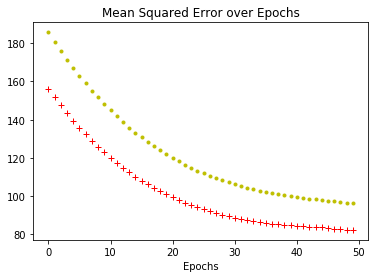

In [51]:
#plot mse (metric defined in compile step)
plt.plot(training_model.history['mean_squared_error'][-50:], 'r+', label='training mean_squared_error')
plt.plot(training_model.history['val_mean_squared_error'][-50:], 'y.', label='evaluation mean_squared_error')
plt.xlabel('Epochs')
plt.title('Mean Squared Error over Epochs')
plt.show()

## Evaluate on test data

In [53]:
#evaluate: Returns the loss value & metrics values for the model in test mode (keras documentation) 
model.evaluate(test_set[FEATURES].values, test_set[LABEL].values) 

76/76 [==============================] - 0s 54us/step


[96.31326585066945, 96.31326585066945]

## Making Predictions

In [54]:
#predict: Generates output predictions for the input samples (keras documentation)
predictions = model.predict(x=test_set[FEATURES].values) #, verbose=1)

## RMSE

In [55]:
#get root mean squared error
rmse = np.sqrt(mean_squared_error(test_set[LABEL].values, predictions))
print("RMSE: ", rmse) # 9.81

RMSE:  9.813932048683899


### Question 1: re-train the model by using the following DNN topology (adding a new layer with 100 nodes).
### A) Plot "mean squared error" for the new DNN topology and compare the result with the initial DNN network. ### B) Calcuate the number of new parameters. 
### C) What is the impact on "mean squared error" when using a larger network topology? why?

In [57]:
#train new model with additional 100 node layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,  input_shape=(len(FEATURES),), activation="relu", 
                                kernel_initializer = tf.random_normal_initializer))
model.add(tf.keras.layers.Dense(100, activation="relu", kernel_initializer = tf.random_normal_initializer))
model.add(tf.keras.layers.Dense(1,kernel_initializer = tf.random_normal_initializer)) 
print(model.summary())

#original model for reference
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(10,  input_shape=(len(FEATURES),), activation="sigmoid", 
#                                kernel_initializer = tf.random_normal_initializer))
#model.add(tf.keras.layers.Dense(1,kernel_initializer = tf.random_normal_initializer)) 
#model.summary()

In [61]:
#get weights
layer_input = model.layers[0]
print(layer_input.get_weights()[0],'\n')
print(layer_input.get_weights()[0].shape)

[[ 0.60878754 -1.1110989   2.5595737  -1.3319879  -0.38640565  0.54587007
   0.4752836   0.10964312 -0.17647052  0.10908844]
 [ 0.01554235 -1.7999388   0.8662198  -0.3507296  -1.014258   -0.57960016
  -0.56619275  1.6857933  -1.4156207  -0.55981576]
 [ 0.95472634 -0.10915111  2.1123896  -1.1042067  -0.12507355  0.09118359
  -0.67283314  0.91197735  0.6241279  -1.3470067 ]
 [-0.19839855 -1.0865504  -1.5947303   0.7800112  -0.06819467  0.29791212
   2.050605    0.08513489 -0.3811718  -1.2553935 ]
 [ 1.8793114  -1.8072705   0.06225457  0.6152995  -0.94277465 -1.3940856
   0.60151744 -0.43736613  0.34349146  0.77824396]
 [-1.2857434   1.4127128   0.08853617  0.6358987   0.8312282  -0.12897049
   0.29661188  0.50105214  0.04071983 -0.26258653]
 [-1.2245747  -0.75547004  1.3012805  -1.5054928   1.2196999  -0.10124624
   0.63518786 -0.44737175  0.94537646  0.53591126]
 [ 0.00498198 -0.25785452 -1.3921765  -1.095456    1.2865021  -0.1091504
  -1.762889   -2.1379344   0.5495012  -0.6437378 ]
 [

In [63]:
#compile model, get metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [64]:
#train model
training_model = model.fit(training_set[FEATURES].values, 
          training_set[LABEL].values, 
          epochs=epochs_value,
          batch_size=batch_size_value,
          validation_data=(test_set[FEATURES].values, test_set[LABEL].values))

Train on 430 samples, validate on 76 samples
Epoch 1/100
430/430 [==============================] - 0s 692us/step - loss: 360822.8633 - mean_squared_error: 360822.8633 - val_loss: 61055.0021 - val_mean_squared_error: 61055.0021
Epoch 2/100
430/430 [==============================] - 0s 182us/step - loss: 51797.4219 - mean_squared_error: 51797.4219 - val_loss: 42045.7084 - val_mean_squared_error: 42045.7084
Epoch 3/100
430/430 [==============================] - 0s 152us/step - loss: 38509.0367 - mean_squared_error: 38509.0367 - val_loss: 31328.8224 - val_mean_squared_error: 31328.8224
Epoch 4/100
430/430 [==============================] - 0s 123us/step - loss: 29472.8126 - mean_squared_error: 29472.8126 - val_loss: 24440.5687 - val_mean_squared_error: 24440.5687
Epoch 5/100
430/430 [==============================] - 0s 123us/step - loss: 21657.4742 - mean_squared_error: 21657.4742 - val_loss: 16398.5612 - val_mean_squared_error: 16398.5612
Epoch 6/100
430/430 [===========================

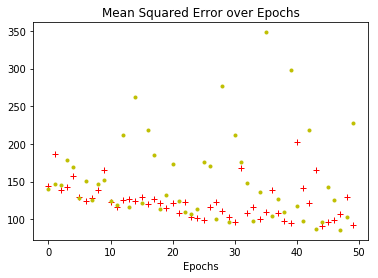

In [65]:
#plot MSE, compare with initial plot
plt.plot(training_model.history['mean_squared_error'][-50:], 'r+', label='training mean_squared_error')
plt.plot(training_model.history['val_mean_squared_error'][-50:], 'y.', label='evaluation mean_squared_error')
plt.xlabel('Epochs')
plt.title('Mean Squared Error over Epochs')
plt.show()

#new model:
#training MSE: 185.3023, evaluation MSE: 118.8821

#original model:
#training MSE: 81.7415, evaluation MSE: 94.5644


In [69]:
#calc number of new parameters
print(model.summary(),'\n')
print('Total parameters = 1,301')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_10 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________
None 

Total parameters = 1,301


In [82]:
print('What is impact on MSE when using larger network topology?','\n')

print('Adding a new layer with 100 nodes did not improve the MSE, instead it increased the MSE.')
print('Predictions with a larger network topology were worse on a small data set with only 506 records.')


What is impact on MSE when using larger network topology? 

Adding a new layer with 100 nodes did not improve the MSE, instead it increased the MSE.
Predictions with a larger network topology were worse on a small data set with only 506 records.


### Question 2: change the value of epochs_value = 100 to epochs_value = 300. what is the learning impact why?

In [81]:
#update variables
learning_rate = 0.01
epochs_value = 300
batch_size_value = 8

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,  input_shape=(len(FEATURES),), activation="sigmoid", 
                                kernel_initializer = tf.random_normal_initializer))
model.add(tf.keras.layers.Dense(1,kernel_initializer = tf.random_normal_initializer)) 

In [74]:
#get weights
layer_input = model.layers[0]
print(layer_input.get_weights()[0],'\n')
print(layer_input.get_weights()[0].shape)

[[-1.4085709  -0.7519859   0.9253528  -0.08228048  0.6072347  -2.2779963
  -1.2393609  -1.4339924   0.46896303  1.6053153 ]
 [ 0.01852518  1.0100051   0.04783068 -1.9334697  -1.0582252   0.02903952
  -0.90989095  0.20021836 -0.41708174 -0.3135062 ]
 [-0.49662405  0.26587686  0.28850502  0.5575976   0.95340115 -0.3496526
  -1.5713049  -1.4910243  -0.59385246  1.9667561 ]
 [ 1.6364404   1.6482077   0.4114532  -0.3053939  -0.2995816   0.5685124
   0.8435663  -0.6476623   1.8215812   0.8613719 ]
 [ 0.52187824  0.02675389 -0.33632913  0.07081047  1.5873246   0.6988723
  -0.5798571  -0.04047091  0.52257365 -0.73919004]
 [ 0.7119937   0.81507427  0.42281744  0.22445044 -4.161652    1.5839391
   0.41782174  0.42605984  0.37755898 -0.2841262 ]
 [-0.7691108  -0.34225708 -1.4835662  -0.30986515 -1.2736353   0.9807094
   1.4318776  -1.7509807  -0.6285634   1.5130093 ]
 [ 0.00609522  0.01189251  0.4374509  -0.07557318  0.18605141 -0.20990579
  -0.03914224  0.09963965  0.00875721 -0.1346639 ]
 [ 0.5

In [76]:
#compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [77]:
#train model
training_model = model.fit(training_set[FEATURES].values, 
          training_set[LABEL].values, 
          epochs=epochs_value,
          batch_size=batch_size_value,
          validation_data=(test_set[FEATURES].values, test_set[LABEL].values))

Train on 430 samples, validate on 76 samples
Epoch 1/300
430/430 [==============================] - 0s 630us/step - loss: 590.0677 - mean_squared_error: 590.0677 - val_loss: 647.8846 - val_mean_squared_error: 647.8846
Epoch 2/300
430/430 [==============================] - 0s 108us/step - loss: 579.3438 - mean_squared_error: 579.3438 - val_loss: 634.6720 - val_mean_squared_error: 634.6720
Epoch 3/300
430/430 [==============================] - 0s 106us/step - loss: 566.9240 - mean_squared_error: 566.9240 - val_loss: 622.6828 - val_mean_squared_error: 622.6828
Epoch 4/300
430/430 [==============================] - 0s 109us/step - loss: 556.6859 - mean_squared_error: 556.6859 - val_loss: 612.4887 - val_mean_squared_error: 612.4887
Epoch 5/300
430/430 [==============================] - 0s 106us/step - loss: 543.7978 - mean_squared_error: 543.7978 - val_loss: 599.9417 - val_mean_squared_error: 599.9417
Epoch 6/300
430/430 [==============================] - 0s 145us/step - loss: 532.4317 - me

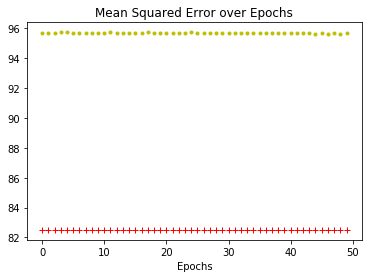

In [78]:
#plot MSE, compare with initial plot
plt.plot(training_model.history['mean_squared_error'][-50:], 'r+', label='training mean_squared_error')
plt.plot(training_model.history['val_mean_squared_error'][-50:], 'y.', label='evaluation mean_squared_error')
plt.xlabel('Epochs')
plt.title('Mean Squared Error over Epochs')
plt.show()

#new model(300 epochs):
#training MSE: 78.2353, evaluation MSE: 92.6427

#original model:
#training MSE: 81.7415, evaluation MSE: 94.5644


In [80]:
#calc number of new parameters
print(model.summary(),'\n')
print('Total parameters = 111')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
None 

Total parameters = 111


In [17]:
print('What is the impact of changing epoch values from 100 to 300?','\n')

print('The training and evaulation MSE both decreased slightly when using 300 epochs instead of 100.')
print('The plot above shows the change and the decreasing trend as epochs increase.')

What is the impact of changing epoch values from 100 to 300? 

The training and evaulation MSE both decreased slightly when using 300 epochs instead of 100.
The plot above shows the change and the decreasing trend as epochs increase.
